In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
rng = np.random.default_rng()

In [3]:
N = 100
COL = 64
ROW = 64
C = 2
J = 1
H = 0
B = 1 / 2.26

In [4]:
def e(x):
    return -(J * (np.sum(x[:-1, :] * x[1:, :]) + np.sum(x[:, :-1] * x[:, 1:])) + H * np.sum(x))

In [5]:
def dE(x, i, j):
    de = x[i - 1, j] if i != 0 else 0
    de += x[i + 1, j] if i != ROW - 1 else 0
    de += x[i, j - 1] if j != 0 else 0
    de += x[i, j + 1] if j != COL - 1 else 0
    return 2 * (J * de + H) * x[i, j]

In [6]:
samples = []
update_cnt = 0
x = np.ones((ROW, COL))

for _ in range(N):
    for i in range(ROW):
        for j in range(COL):
            if rng.random() < np.exp(-B * dE(x, i, j)):
                x[i, j] *= -1
                samples.append(e(x))
            #samples.append(deepcopy(x))
                


In [7]:
#energies = np.array([e(x) for x in samples])
energies = np.array(samples)
B**2 * (np.average(energies**2) - np.average(energies)**2) / (COL * ROW)

3.164748650455358

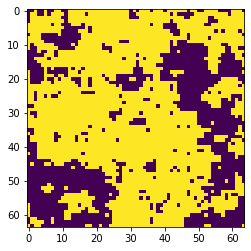

In [8]:
plt.imshow(x)

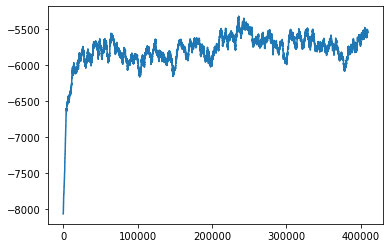

In [82]:
plt.plot(samples)

In [109]:
samples = []
update_cnt = 0
x = np.ones((ROW, COL))
energy = e(x)

for _ in range(N):
    for i in range(ROW):
        for j in range(COL):
            if x[i, j] == 1:
                energy1 = energy
                energy2 = energy + dE(x, i, j)
            else:
                energy2 = energy
                energy1 = energy + dE(x, i, j)
                
            if rng.random() < 1 / (1 + np.exp(-B * (energy2 - energy1))):
                x[i, j] = 1
                energy = energy1
            else:
                x[i, j] = -1
                energy = energy2
            samples.append(energy)

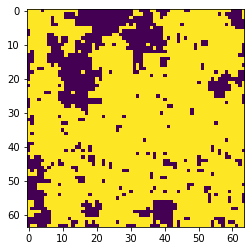

In [110]:
plt.imshow(x)

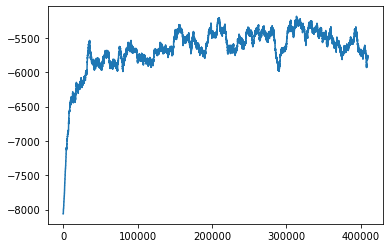

In [111]:
plt.plot(samples)

In [108]:
samples

[0.8544466654293732,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.7078481211033909,
 0.7078481211033909,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.7078481211033909,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.7078481211033909,
 0.7078481211033909,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.7078481211033909,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.9343103482766966,
 0.7078481211033909,
 0.9343103482766966,
 0.9343103482